# EDA Part 1
EDA dilakukan untuk mendapatkan insight berdasarkan data yang dimiliki.

In [1]:
# Import Library

# Data
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Dataset 
df = pd.read_csv('/content/drive/MyDrive/Project Purwadhika/data_outlist_clean.csv', parse_dates = ['order_purchase_timestamp'] )

df

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,month_order,weekday_order,month_year_order,date_order
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1.0,1.0,credit_card,146.87,4.0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture,May,Tuesday,2017-05,16
1,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,1.0,1.0,credit_card,157.73,5.0,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture,May,Saturday,2018-05,19
2,951670f92359f4fe4a63112aa7306eba,2018-03-13,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,1.0,1.0,credit_card,173.30,5.0,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture,March,Tuesday,2018-03,13
3,997fd4b37386d10b57d4ac8cdec011a6,2018-07-08,1.0,8ed094bfe076c568f6bb10feada3f75d,199.98,115.77,1.0,1.0,credit_card,315.75,1.0,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture,July,Sunday,2018-07,8
4,b63fff1ef8b6201df68bb611ee41129e,2017-04-02,1.0,aba86c093ccdbac75b09111d57e50004,129.60,16.61,1.0,1.0,boleto,146.21,4.0,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture,April,Sunday,2017-04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116162,b99217b1fcf2fdeace7b8d869b76cb91,2018-03-07,1.0,57bdf3098169cccdb62221bd3e089cbd,39.99,10.15,1.0,1.0,credit_card,110.44,5.0,a1d53377ab83871b0ad483b03ac69d6c,3570,sao paulo,SP,fashion_childrens_clothes,March,Wednesday,2018-03,7
116163,ee86b68eb9222b0cad7da50f4f758a35,2017-05-17,1.0,0ab3ab3b2869073aa9afe795fe9151aa,110.00,14.52,4.0,1.0,credit_card,124.52,5.0,1b553902a5bbe6ee54a3aaa7cbfb6816,26255,nova iguacu,RJ,fashion_childrens_clothes,May,Wednesday,2017-05,17
116164,9fa3a005f89a187501fa1bd63d6125fb,2017-10-08,1.0,57bdf3098169cccdb62221bd3e089cbd,39.99,14.10,1.0,1.0,credit_card,54.09,5.0,f979a07fc18b2af3780a796ba14b96f4,4271,sao paulo,SP,fashion_childrens_clothes,October,Sunday,2017-10,8
116165,2c4ada2e75c2ad41dd93cebb5df5f023,2017-01-26,1.0,6c7a0a349ad11817745e3ad58abd5c79,183.29,25.77,1.0,1.0,credit_card,209.06,4.0,d8bee9ec375c3a0f9ef8ed7456a51dcd,76940,rolim de moura,RO,security_and_services,January,Thursday,2017-01,26


## Descriptive Analysis
Untuk mengetahui tipe dan karakteristik dari data yang dimiliki.

In [4]:
# Number of column & row
df.shape

(116167, 20)

> This dataset contain **20 columns** with **116167 rows** and non null data.      

In [5]:
# Dataset column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116167 entries, 0 to 116166
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116167 non-null  object        
 1   order_purchase_timestamp       116167 non-null  datetime64[ns]
 2   order_item_id                  116167 non-null  float64       
 3   product_id                     116167 non-null  object        
 4   price                          116167 non-null  float64       
 5   freight_value                  116167 non-null  float64       
 6   product_photos_qty             116167 non-null  float64       
 7   payment_sequential             116167 non-null  float64       
 8   payment_type                   116167 non-null  object        
 9   payment_value                  116167 non-null  float64       
 10  review_score                   116167 non-null  float64       
 11  

> Data Type 
- Integer  : customer_zip_code_prefix (1)     
- Float  : order_item_id, price, freight_value, product_photos_qty, payment_sequential, payment_value, review_score (7)
- Object : order_id, customer_unique_id, order_purchase_timestamp, product_id, payment_type, customer_city, customer_state, product_category_name_english, month_order, weekday_order, month_year_order, date_order (12)

In [6]:
# Dataset descriptive statistic
df.describe()

,order_item_id,price,freight_value,product_photos_qty,payment_sequential,payment_value,review_score,customer_zip_code_prefix,date_order
count,116167.000000,116167.000000,116167.000000,116167.000000,116167.000000,116167.000000,116167.000000,116167.000000,116167.000000
mean,1.196725,120.849078,20.071652,2.206685,1.093004,173.001786,4.016709,35055.443887,15.557043
std,0.699913,184.043794,15.859554,1.718638,0.725388,267.887642,1.397899,29815.334133,8.663464
min,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,1.000000,1003.000000,1.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,61.010000,4.000000,11320.000000,8.000000
50%,1.000000,74.900000,16.320000,1.000000,1.000000,108.200000,5.000000,24315.000000,16.000000
75%,1.000000,134.900000,21.220000,3.000000,1.000000,189.870000,5.000000,58610.000000,23.000000
max,21.000000,6735.000000,409.680000,20.000000,29.000000,13664.080000,5.000000,99980.000000,31.000000


In [7]:
# Number of unique values for each columns
df.nunique().sort_values(ascending=False)

order_id                         97255
customer_unique_id               94087
product_id                       32328
payment_value                    28765
customer_zip_code_prefix         14927
freight_value                     6977
price                             5899
customer_city                     4095
order_purchase_timestamp           615
product_category_name_english       69
date_order                          31
payment_sequential                  29
customer_state                      27
month_year_order                    24
order_item_id                       21
product_photos_qty                  19
month_order                         12
weekday_order                        7
review_score                         5
payment_type                         4
dtype: int64

In [8]:
# Data type for each columns
numeric_var = df.select_dtypes(include=['int', 'float'])
object_var = df.select_dtypes(include=['object'])

print('Numerical Variables: ', numeric_var.columns)
print('Categorical Variables: ',object_var.columns)

Numerical Variables:  Index(['order_item_id', 'price', 'freight_value', 'product_photos_qty',
       'payment_sequential', 'payment_value', 'review_score',
       'customer_zip_code_prefix', 'date_order'],
      dtype='object')
Categorical Variables:  Index(['order_id', 'product_id', 'payment_type', 'customer_unique_id',
       'customer_city', 'customer_state', 'product_category_name_english',
       'month_order', 'weekday_order', 'month_year_order'],
      dtype='object')


> There are **8 columns contain numerical variables** and **12 columns contain categorical variables.**

## Time Series by: Order, Customer, and Total Payment
Visualisasi perkembangan jumlah *order*, jumlah *customer*, dan total transaksi dari waktu ke waktu.


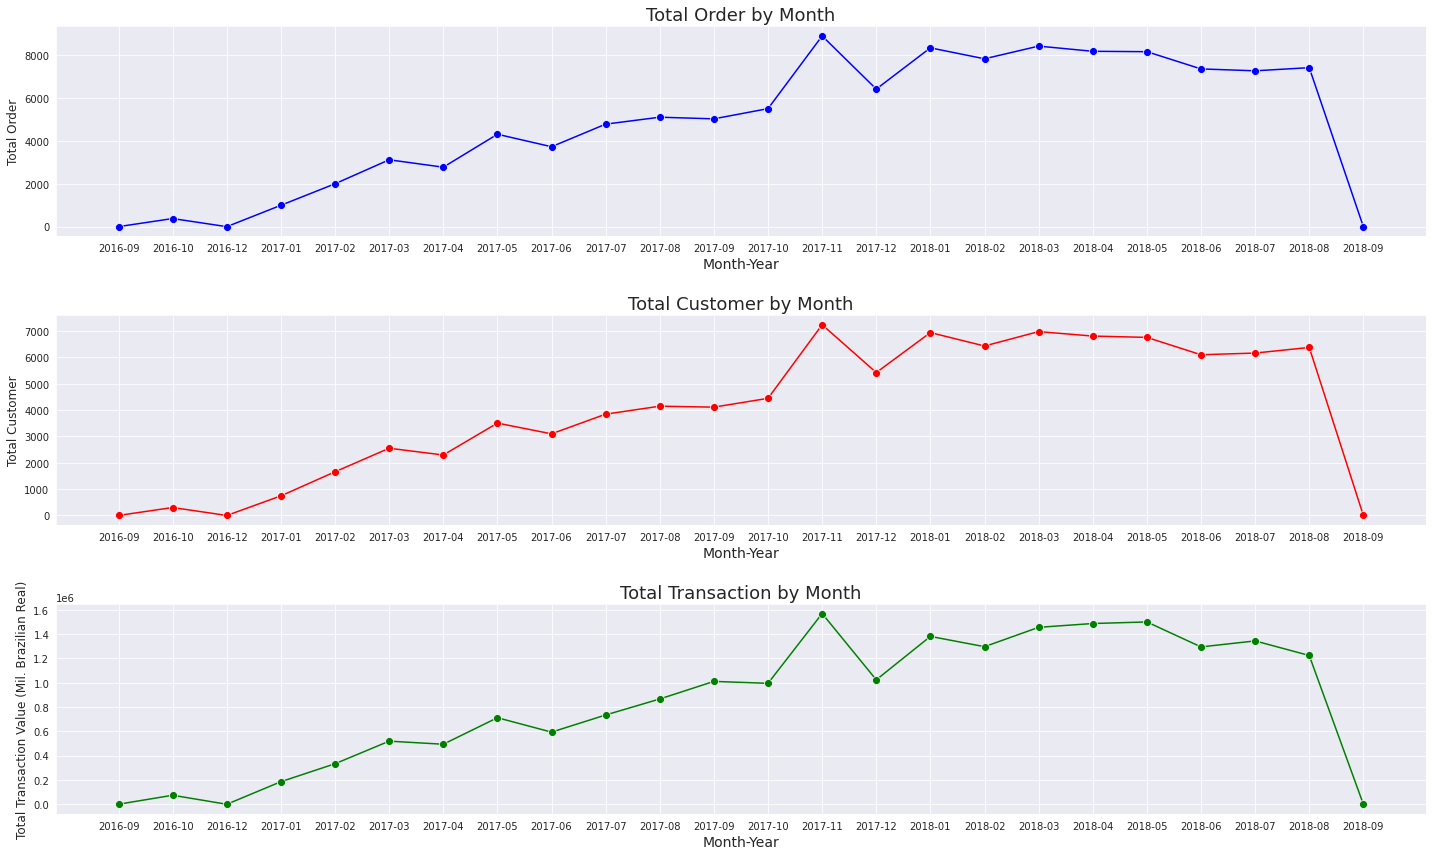

In [9]:
# Group by order, customer, and transaction
order_per_month = df['order_id'].groupby(df['month_year_order']).count()
customer_per_month = df['customer_unique_id'].groupby(df['month_year_order']).nunique()
transaction_per_month = df['payment_value'].groupby(df['month_year_order']).sum()

# Visualization
plt.figure(figsize=(20, 12))

plt.subplot(311)
sns.lineplot(x=order_per_month.index, y=order_per_month.values, marker='o', markersize=8, color='blue')
plt.title('Total Order by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Order', fontsize=12)

plt.subplot(312)
sns.lineplot(x=customer_per_month.index, y=customer_per_month.values, marker='o', markersize=8, color='red')
plt.title('Total Customer by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Customer', fontsize=12)

plt.subplot(313)
sns.lineplot(x=transaction_per_month.index, y=transaction_per_month.values, marker='o', markersize=8, color='green')
plt.title('Total Transaction by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Transaction Value (Mil. Brazilian Real)', fontsize=12)

plt.tight_layout()
plt.show()

> - Jumlah order, total transaksi, dan jumlah customer terbanyak terdapat pada bulan November, 2017. Hal ini dapat terjadi karena pada bulan November ada Black Friday yang menawarkan promo agar customer berbelanja untuk hadiah Natal.
- Grafik cenderung meningkat dari tahun 2016 hingga tahun 2017. Namun, mengalami stagnan saat memasuki tahun 2018.
- Terdapat anomali/noise pada data di bulan September, 2018 yang menunjukkan penurunan secara tiba-tiba. Hal ini mungkin saja terjadi karena pengambilan data yang berakhir pada bulan tersebut sehingga data yang diambil pada bulan tersebut tidak lengkap.

## Customers
Untuk mengetahui banyaknya order dan jumlah transaksi yang dilakukan oleh seorang customer.

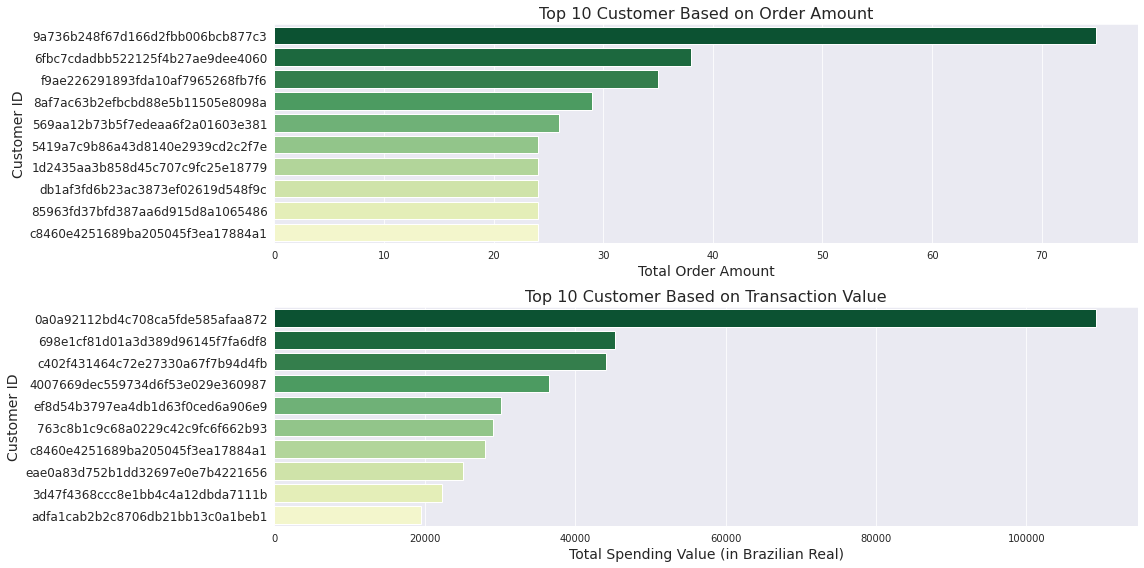

In [48]:
# Top 10 customer berdasarkan frekuensi order
top_10_customer_order = df['order_id'].groupby(df['customer_unique_id']).count().sort_values(ascending=False)[:10]

# Top 10 customer berdasarkan jumlah nilai transaksi 
top_10_customer_transaction = df['payment_value'].groupby(df['customer_unique_id']).sum().sort_values(ascending=False)[:10]

# Visualization
plt.figure(figsize=(16,8))

plt.subplot(211)
sns.barplot(y=top_10_customer_order.index, x=top_10_customer_order.values, palette='YlGn_r')
plt.title('Top 10 Customer Based on Order Amount',fontsize=16)
plt.xlabel('Total Order Amount',fontsize=14)
plt.ylabel('Customer ID',fontsize=14)
plt.yticks(fontsize=12)

plt.subplot(212)
sns.barplot(y=top_10_customer_transaction.index, x=top_10_customer_transaction.values, palette='YlGn_r')
plt.title('Top 10 Customer Based on Transaction Value',fontsize=16)
plt.xlabel('Total Spending Value (in Brazilian Real)',fontsize=14)
plt.ylabel('Customer ID',fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
print('Total order terbanyak dari 1 customer :', top_10_customer_order.values[:1])
print('Total transaksi terbanyak dari customer :', top_10_customer_transaction.values[:1])

Total order terbanyak dari 1 customer : [75]
Total transaksi terbanyak dari customer : [109312.64]


> - Total order terbanyak dari 1 customer adalah : 75 order
- Total transaksi terbanyak dari 1 customer adalah : R$ 109,312.64

## Order
Untuk melihat jumlah order berdasarkan bulan, tanggal, dan hari. 

In [12]:
print('Jumlah data order :' ,df['order_id'].nunique())

Jumlah data order : 97255


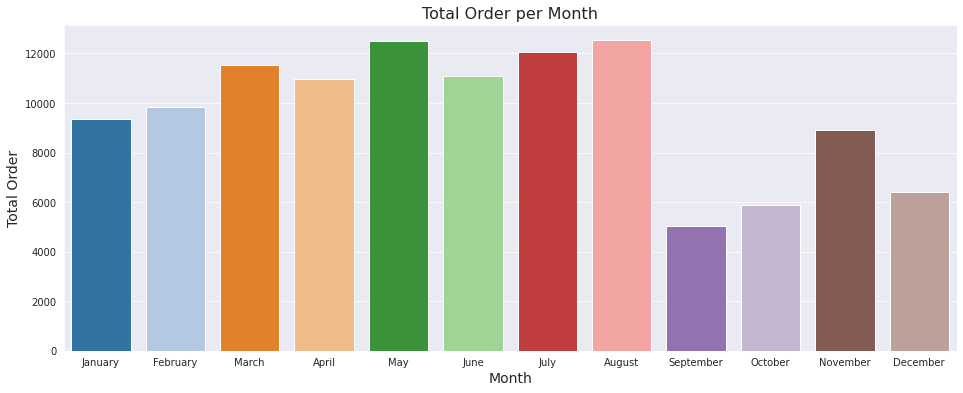

In [13]:
# Total Order per Month 
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(16,6))
sns.countplot(x='month_order', data=df, order=month, palette='tab20')
plt.title('Total Order per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Order', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [14]:
print('Jumlah order pada bulan Agustus:', df[df['month_order']=='August']['order_id'].count(), 'pesanan')
print('Jumlah order pada bulan Mei:', df[df['month_order']=='May']['order_id'].count(), 'pesanan')
print('Jumlah order pada bulan Juli:', df[df['month_order']=='July']['order_id'].count(), 'pesanan')

Jumlah order pada bulan Agustus: 12537 pesanan
Jumlah order pada bulan Mei: 12487 pesanan
Jumlah order pada bulan Juli: 12066 pesanan


> - Jumlah order paling banyak terjadi pada bulan Mei dan Agustus.
- Jumlah order paling sedikit terjadi pada bulan September.
- Jumlah order di awal tahun cenderung meningkat, namun di akhir tahun jumlah pesanan cenderung menurun.

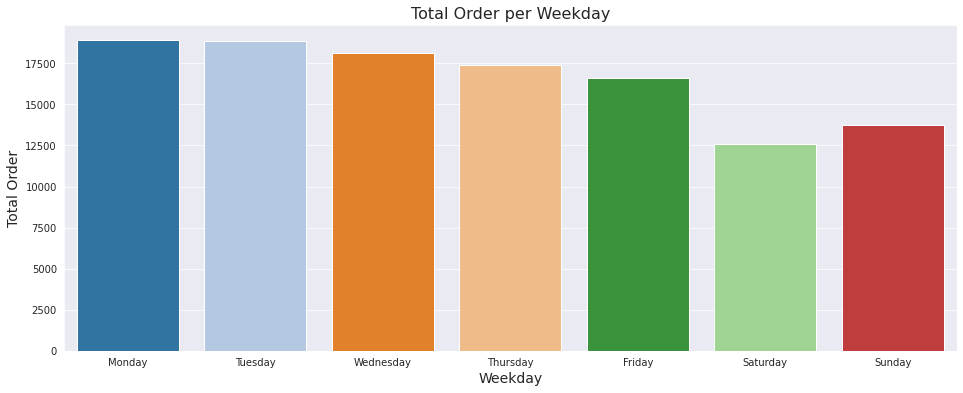

In [15]:
# Total Order per Month Day Name/Weekday
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(16, 6))
sns.countplot(x='weekday_order', data=df, order=weekday, palette='tab20')
plt.title('Total Order per Weekday',fontsize=16)
plt.xlabel('Weekday',fontsize=14)
plt.ylabel('Total Order',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [16]:
print('Jumlah order pada hari Senin:', df[df['weekday_order']=='Monday']['order_id'].count(), 'pesanan')
print('Jumlah order pada hari Selasa:', df[df['weekday_order']=='Tuesday']['order_id'].count(), 'pesanan')
print('Jumlah order pada hari Rabu:', df[df['weekday_order']=='Wednesday']['order_id'].count(), 'pesanan')

Jumlah order pada hari Senin: 18907 pesanan
Jumlah order pada hari Selasa: 18835 pesanan
Jumlah order pada hari Rabu: 18152 pesanan


> - Customer paling sering melakukan order pada hari Senin.
- Customer paling jarang melakukan order pada hari Sabtu dan Minggu (akhir pekan). 
- Semakin mendekati akhir pekan, jumlah order semakin menurun.

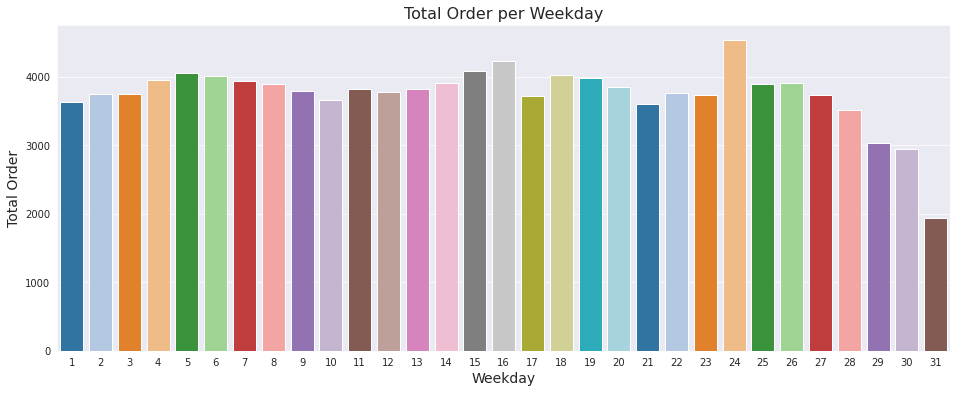

In [17]:
# Total Order per Date

plt.figure(figsize=(16, 6))
sns.countplot(x='date_order', data=df, palette='tab20')
plt.title('Total Order per Weekday',fontsize=16)
plt.xlabel('Weekday',fontsize=14)
plt.ylabel('Total Order',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
print('Jumlah order pada tanggal 24:', df[df['date_order']==24]['order_id'].count(), 'pesanan')

Jumlah order pada tanggal 24: 4532 pesanan


> - Jumlah *order* paling banyak terjadi pada tanggal 24. Hal ini dapat terjadi karena biasanya pada tanggal tersebut biasanya *customer* mendapat gaji.
- Sedangkan *order* paling sedikit terjadi pada akhir bulan atau tanggal 29 hingga 31. 

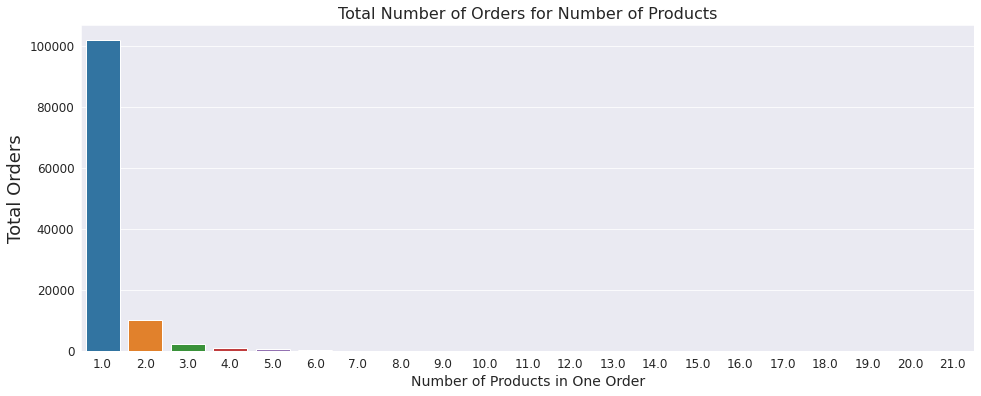

In [19]:
# Jumlah produk yang di order dalam 1 kali transaksi

# Visualization
fig=plt.figure(figsize=(16,6))
sns.countplot(x='order_item_id', data=df, palette='tab10')
plt.title('Total Number of Orders for Number of Products',fontsize=16)
plt.xlabel('Number of Products in One Order',fontsize=14)
plt.ylabel('Total Orders',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [20]:
print('Jumlah order dengan kuantitas 1 barang:', df[df['order_item_id']==1.0]['order_id'].count(), 'pesanan')
print('Jumlah order dengan kuantitas 2 barang:', df[df['order_item_id']==2.0]['order_id'].count(), 'pesanan')
print('Jumlah order dengan kuantitas 3 barang:', df[df['order_item_id']==3.0]['order_id'].count(), 'pesanan')

Jumlah order dengan kuantitas 1 barang: 101756 pesanan
Jumlah order dengan kuantitas 2 barang: 10135 pesanan
Jumlah order dengan kuantitas 3 barang: 2355 pesanan


> - Pesanan dengan kuantitas 1 buah produk merupakan pesanan yang paling banyak dilakukan *customer*.
- Terdapat perbedaan yang sangat signifikan antara pesanan dengan kuantitas 1 buah produk dan pesanan dengan kuantitas lebih dari 1 buah produk.
- Kuanititas produk terbanyak yang dipesan dalam 1 kali pesanan adalah sebanyak 21 produk.

## Product
Untuk mengetahui kategori produk apa yang paling banyak di pesan *customer*.

In [21]:
print('Jumlah data product :' ,df['product_id'].nunique())

Jumlah data product : 32328


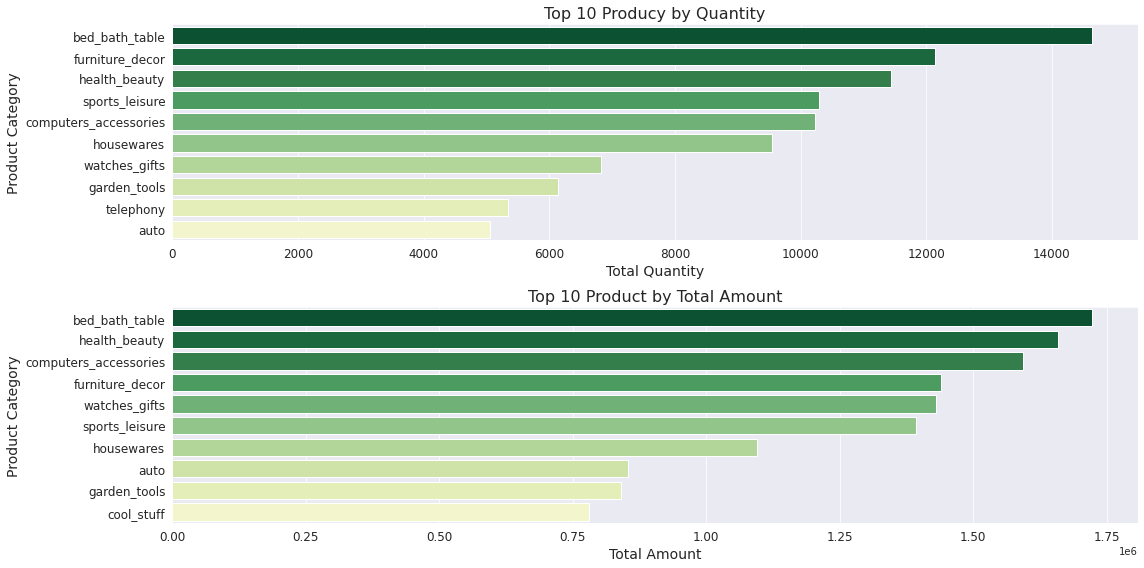

In [49]:
# Top 10 Category Product 
top_10_product_by_quantity = df['order_item_id'].groupby(df['product_category_name_english']).sum().sort_values(ascending=False)[:10]
top_10_product_by_payment_value = df['payment_value'].groupby(df['product_category_name_english']).sum().sort_values(ascending=False)[:10]

# Visualization
plt.figure(figsize=(16,8))

plt.subplot(211)
sns.barplot(y=top_10_product_by_quantity.index, x=top_10_product_by_quantity .values, palette='YlGn_r')
plt.title('Top 10 Producy by Quantity',fontsize=16)
plt.xlabel('Total Quantity',fontsize=14)
plt.ylabel('Product Category',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(212)
sns.barplot(y=top_10_product_by_payment_value.index, x=top_10_product_by_payment_value.values, palette='YlGn_r')
plt.title('Top 10 Product by Total Amount',fontsize=16)
plt.xlabel('Total Amount',fontsize=14)
plt.ylabel('Product Category',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

> - Kategori produk dengan jumlah kuantitas pesanan terbanyak adalah *bed_bath_table*, diikuti oleh *furniture_decor* dan *health_beauty.*
- Kategori produk dengan jumlah *payment* paling tinggi adalah *bad_bath_table*, lalu diikuti oleh *health_beauty*, dan *computers_accesoires*.

## City

In [23]:
print('Jumlah kota :' ,df['customer_state'].nunique())

Jumlah kota : 27


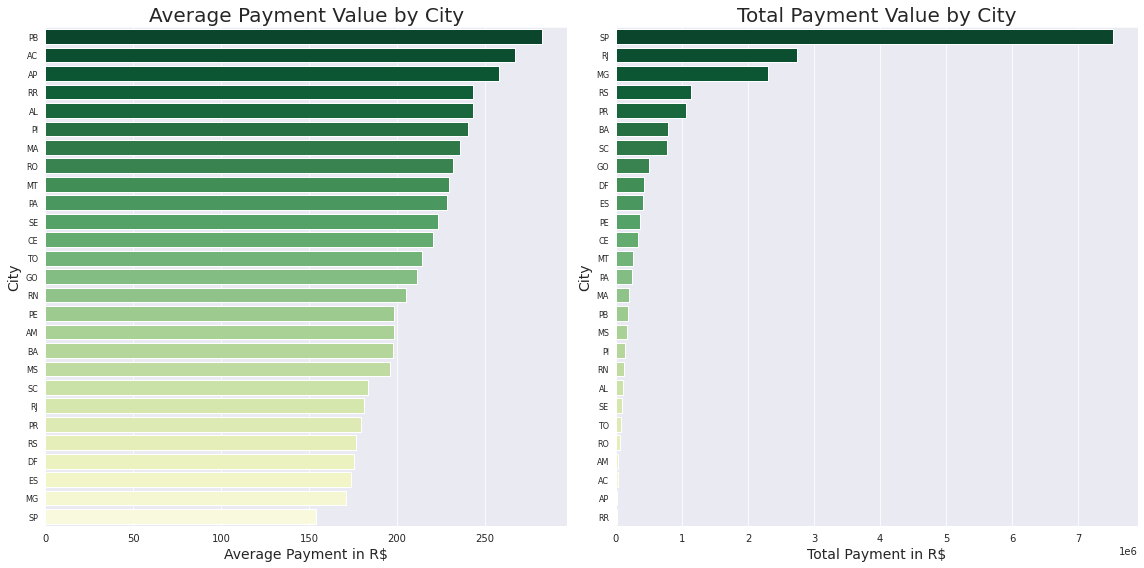

In [50]:
# Top City berdasarkan rata-rata pembayaran
top_10_town_avg = df['payment_value'].groupby(df['customer_state']).mean().sort_values(ascending=False)

# Top City berdasarkan total pembayaran
top_10_town_sum = df['payment_value'].groupby(df['customer_state']).sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(y=top_10_town_avg.index, x=top_10_town_avg.values, palette='YlGn_r')
plt.title('Average Payment Value by City',fontsize=20)
plt.xlabel('Average Payment in R$',fontsize=14)
plt.ylabel('City',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.subplot(122)
sns.barplot(y=top_10_town_sum.index, x=top_10_town_sum.values, palette='YlGn_r')
plt.title('Total Payment Value by City',fontsize=20)
plt.xlabel('Total Payment in R$',fontsize=14)
plt.ylabel('City',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> - Kota dengan jumlah transaksi terbanyak adalah SP (Sao Paolo), lalu diikuti RJ (Rio de Janeiro).
- Namun berdasarkan rata-rata transaksi, SP (Sao Paolo) memiliki rata-rata yang paling kecil hanya sekitar R\$ 150 dalam satu kali order. 


## Payment Value

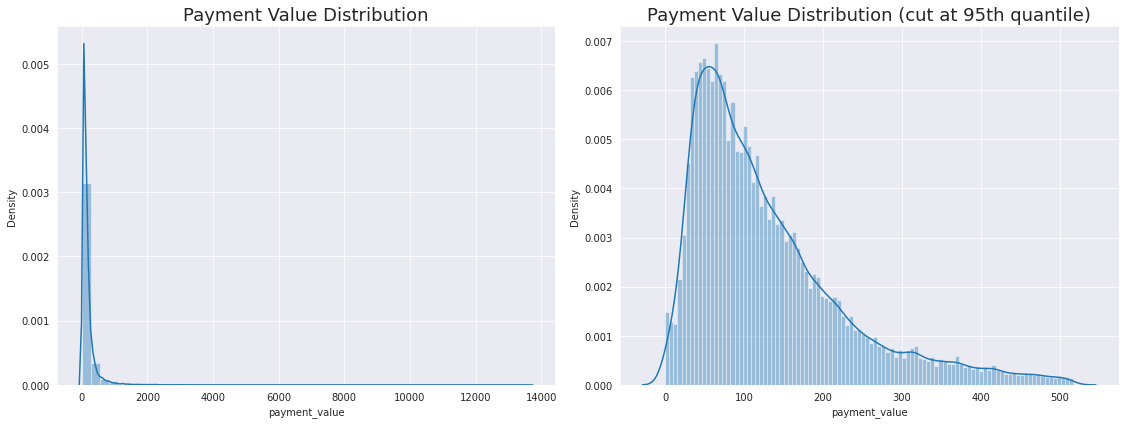

In [25]:
# Distribusi Payment Value
q95 = df['payment_value'].quantile(.95)
payments_q95 = df[df['payment_value']<q95]

plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.distplot(df['payment_value'])
plt.title('Payment Value Distribution', fontsize=18)

plt.subplot(122)
sns.distplot(payments_q95['payment_value'], bins=100)
plt.title('Payment Value Distribution (cut at 95th quantile)', fontsize=18)
plt.tight_layout()
plt.show()

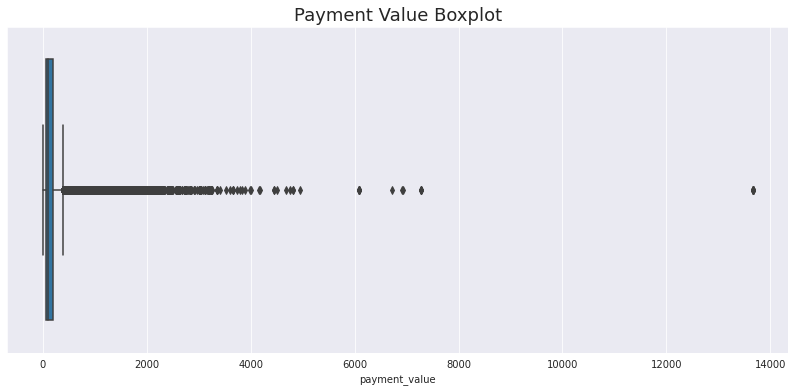

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(df['payment_value'])
plt.title('Payment Value Boxplot', fontsize=18)
plt.show()

> - Berdasarkan histogram diatas, sebaran jumlah transaksi oleh customer berada pada rentang R\$1 - R\$14,000
- Jumlah transaksi terbanyak terdapat pada rentang R\$1 - R\$200. Hal ini dapat terjadi karena customer cenderung membeli barang dengan harga yang terjangkau.

## Payment Type


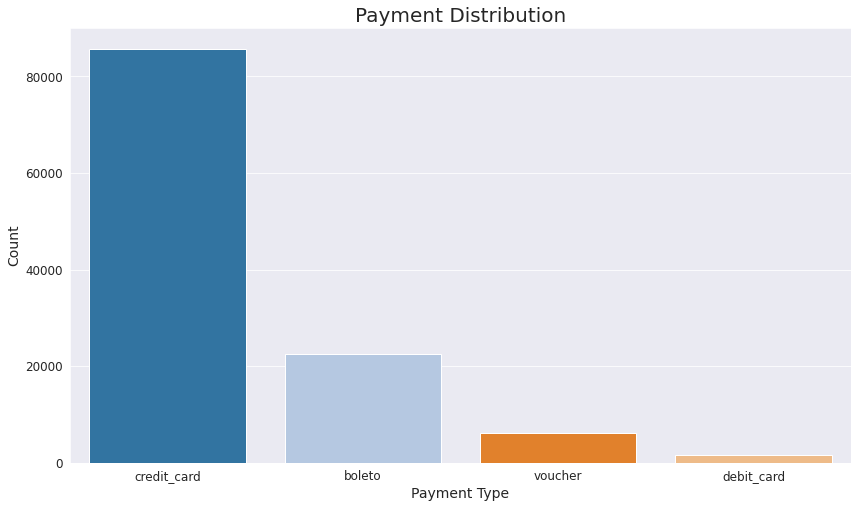

In [27]:
# Visualization Payment Type Distribution

plt.figure(figsize=(14,8))
sns.countplot(x='payment_type', data=df, palette='tab20')
plt.title('Payment Distribution',fontsize=20)
plt.xlabel('Payment Type',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [28]:
print('Total transaksi dengan pembayaran credit card:', df[df['payment_type']=='credit_card']['order_id'].count(), 'pesanan')

Total transaksi dengan pembayaran credit card: 85719 pesanan


> - Metode pembayaran yang paling sering digunakan customer adalah credit card.
- Metode pembayaran sebagai opsi kedua yang digunakan customer adalah boleto. Boleto adalah semacam alat pembayaran khusus yang ada di Brazil.

## Review Score


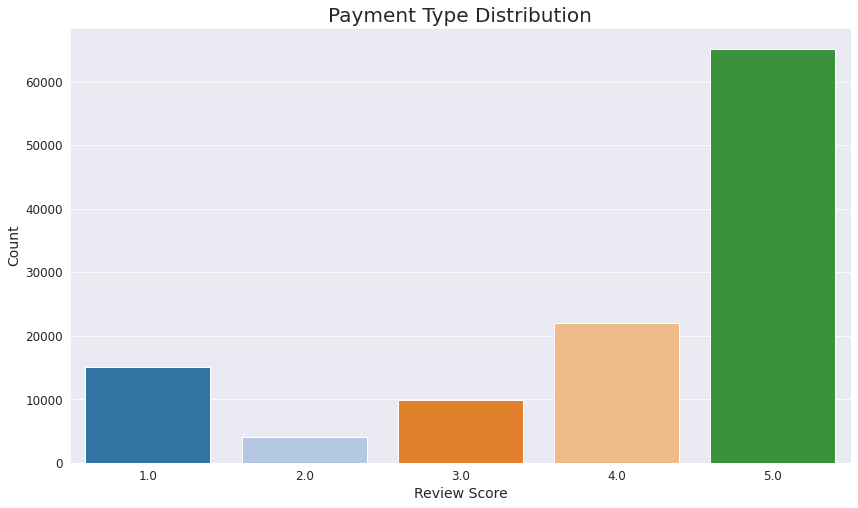

In [29]:
# Visualization Review Score Distribution

plt.figure(figsize=(14,8))
sns.countplot(x='review_score', data=df, palette='tab20')
plt.title('Payment Type Distribution',fontsize=20)
plt.xlabel('Review Score',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [30]:
print('Jumlah order dengan review score 5:', df[df['review_score']==5.0]['order_id'].count(), 'pesanan')
print('Jumlah order dengan review score 4:', df[df['review_score']==4.0]['order_id'].count(), 'pesanan')
print('Jumlah order dengan review score 3:', df[df['review_score']==3.0]['order_id'].count(), 'pesanan')
print('Jumlah order dengan review score 2:', df[df['review_score']==2.0]['order_id'].count(), 'pesanan')
print('Jumlah order dengan review score 1:', df[df['review_score']==1.0]['order_id'].count(), 'pesanan')

Jumlah order dengan review score 5: 65190 pesanan
Jumlah order dengan review score 4: 21970 pesanan
Jumlah order dengan review score 3: 9821 pesanan
Jumlah order dengan review score 2: 4130 pesanan
Jumlah order dengan review score 1: 15056 pesanan


- Jumlah review score paling banyak adalah adalah 5 poin.
- Jumlah review score paling sedikit adalah 2 poin.

# EDA Part 2:
Setelah process EDA di atas, kami ingin melakukan EDA untuk data *customer*. Sebelum melakukan EDA, kami harus melakukan *Feature Engineering* berupa *Recency*, *Frequency*, dan *Monetary* dari masing-masing *customer*. <p> <p>

*RFM* adalah Salah satu teknik yang dapat digunakan untuk melakukan *Customer Segmentation* untuk mengetahui *buying behavior* dari *customer*. Arti dari *RFM* sendiri adalah:
- *Recency*: Waktu terakhir kali *customer* melakukan pembelian
- *Frequency*: Jumlah transaksi
- *Monetary*: Kekuatan belanja dari sebuah *customer* <p>

Dengan menggunakan *RFM*, perusahaan dapat mengaktifkan kembali *customer* yang jarang bertransaksi, membuat *customer* menjadi lebih loyal, menigkatkan strategi marketing sehingga dapat meningkatkan *revenue* dari sebuah perusahaan. 
<p> <p>
<figure>
  <center><img src = "https://www.retailreco.com/blog/wp-content/uploads/2018/11/RFM-Analytics.jpg" alt ="RFM Analysis" width = 400; height = 300></center>
  <figcaption align = "center">Gambar 1. <em>RFM Analysis</em> </figcaption>
</figure>
<p> <p>

## Feature Engineering:
Pada part ini, kami akan melakukan *feature engineering* berupa *Recency*, *Frequency*, dan *Monetary* dari *customer transaction*. Untuk *Recency*, *feature* dibuat dari waktu terakhir dari *column order_purchase_time* ditambah satum lalu dikurang waktu terakhir masing-masing *customer* melakukan pembelian. Penambahan satu dilakukan untuk membuat seolah-olah analisa dilakukan setelah data didapatkan. *Frequency* dibuat dari jumlah *order* yang dibuat *customer*. *Monetary* dibuat dari menjumlahkan semua *column payment value* untuk masing-masing *customer*

In [31]:
#Max time
max_time = df['order_purchase_timestamp'].max() + dt.timedelta(1)

#Groupby customer_unique_id
customer = df.groupby('customer_unique_id', as_index=False).agg(
    recency =  ('order_purchase_timestamp', lambda x: (max_time-x.max()).days),
    frequency = ('order_id', lambda x: x.nunique()),
    monetary =  ('payment_value', 'sum'),
    avg_spend = ('payment_value', 'mean'),
    most_payment_type = ('payment_type', lambda x: x.value_counts().index[0]),
    avg_review_score = ('review_score', 'mean'),
    most_product_buy = ('product_category_name_english', lambda x: x.value_counts().index[0]),
    first_transaction = ('month_year_order', 'min')
)

In [32]:
customer.head()

,customer_unique_id,recency,frequency,monetary,avg_spend,most_payment_type,avg_review_score,most_product_buy,first_transaction
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90,141.90,credit_card,5.0,bed_bath_table,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19,27.19,credit_card,4.0,health_beauty,2018-05
2,0000f46a3911fa3c0805444483337064,543,1,86.22,86.22,credit_card,3.0,stationery,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62,43.62,credit_card,4.0,telephony,2017-10
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89,196.89,credit_card,5.0,telephony,2017-11


In [33]:
# customer.to_csv('/content/drive/MyDrive/Project Purwadhika/customer.csv', index = False)

In [34]:
print('Jumlah data customer :' ,customer['customer_unique_id'].nunique())

Jumlah data customer : 94087


In [35]:
customer.describe()

,recency,frequency,monetary,avg_spend,avg_review_score
count,94087.000000,94087.000000,94087.000000,94087.000000,94087.000000
mean,243.803575,1.033671,213.601225,158.707160,4.089175
std,153.156983,0.208938,644.666063,218.506541,1.336863
min,1.000000,1.000000,9.590000,1.856818,1.000000
25%,120.000000,1.000000,64.000000,60.865000,4.000000
50%,224.000000,1.000000,113.050000,103.650000,5.000000
75%,353.000000,1.000000,203.300000,175.770000,5.000000
max,730.000000,15.000000,109312.640000,13664.080000,5.000000


## Recency

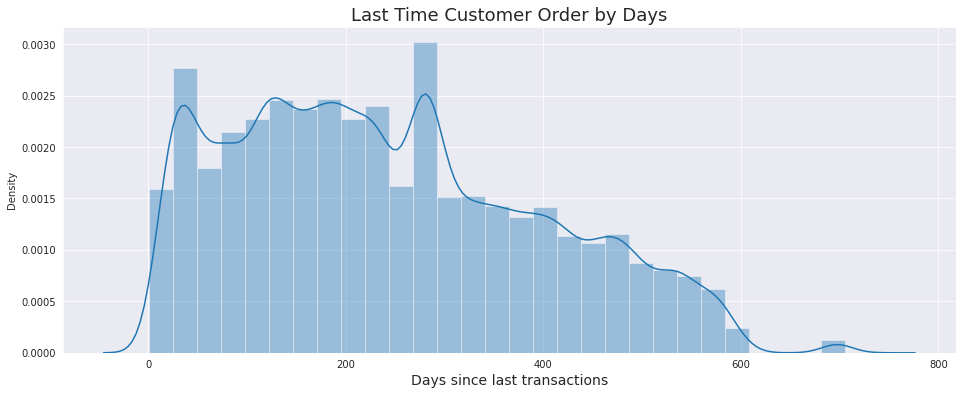

In [36]:
# Distribusi recency
plt.figure(figsize=(16, 6))
sns.distplot(customer['recency'], bins=30)
plt.title('Last Time Customer Order by Days', fontsize=18)
plt.xlabel('Days since last transactions', fontsize=14)
plt.show()

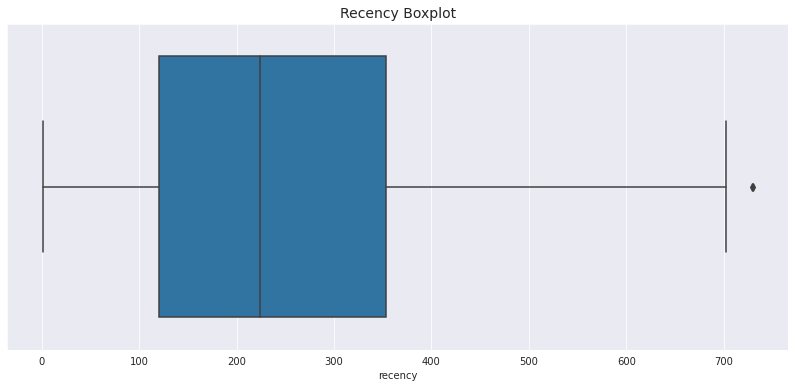

In [37]:
# Recency Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(customer['recency'])
plt.title('Recency Boxplot', fontsize=14)
plt.show()

In [38]:
customer['recency'].describe()

count    94087.000000
mean       243.803575
std        153.156983
min          1.000000
25%        120.000000
50%        224.000000
75%        353.000000
max        730.000000
Name: recency, dtype: float64

> Berdasarkan distribusi dan statistik deskriptif dari recency:
- Waktu terakhir customer melakukan transaksi berkisar 1 hari sampai 730 hari (dari tanggal terakhir pada data)
- Rata-rata customer melakukan transaksi terakhir pada 243 hari atau 8 bulan sekali (setelah tanggal terakhir order)

## Frequency

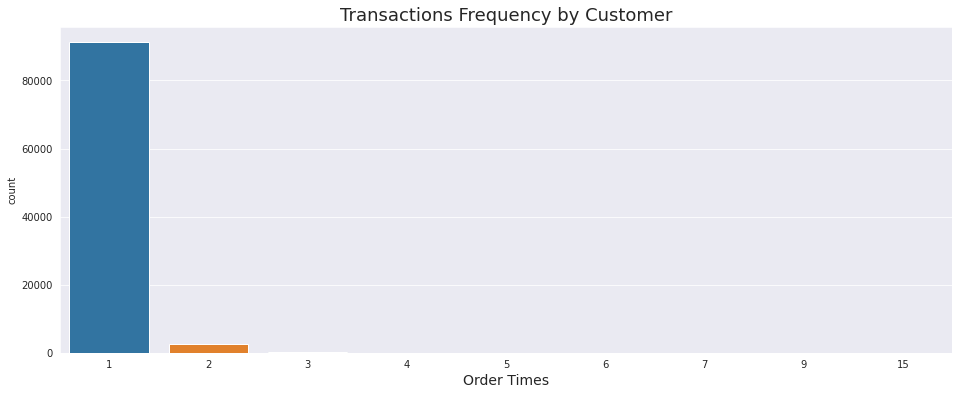

In [39]:
# Distribusi frequency
plt.figure(figsize=(16, 6))
sns.countplot(customer['frequency'])
plt.title('Transactions Frequency by Customer', fontsize=18)
plt.xlabel('Order Times', fontsize=14)
plt.show()

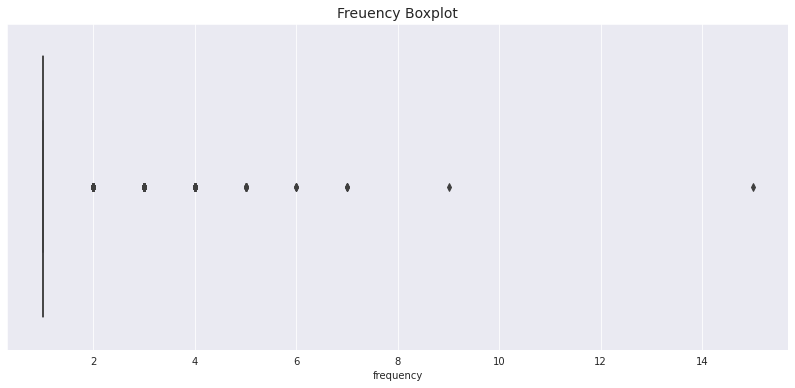

In [40]:
# Frequency Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(customer['frequency'])
plt.title('Freuency Boxplot', fontsize=14)
plt.show()

In [41]:
customer['frequency'].describe()

count    94087.000000
mean         1.033671
std          0.208938
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: frequency, dtype: float64

> - Setiap customer paling sering melakukan order hanya sebanyak 1 kali saat menggunakan e-commerce ini. Oleh karena itu perlu meningkatkan jumlah transaksi yang dilakukan oleh pelanggan dengan melakukan targeted marketing sesuai segmentasinya.
- Jumlah transaksi paling banyak yang dilakukan seorang customer adalah 15 kali transaksi.
- Jumlah transaksi yang dilakukan oleh setiap customer berada di rentang 1 kali hingga 15 kali transaksi.

## Monetary

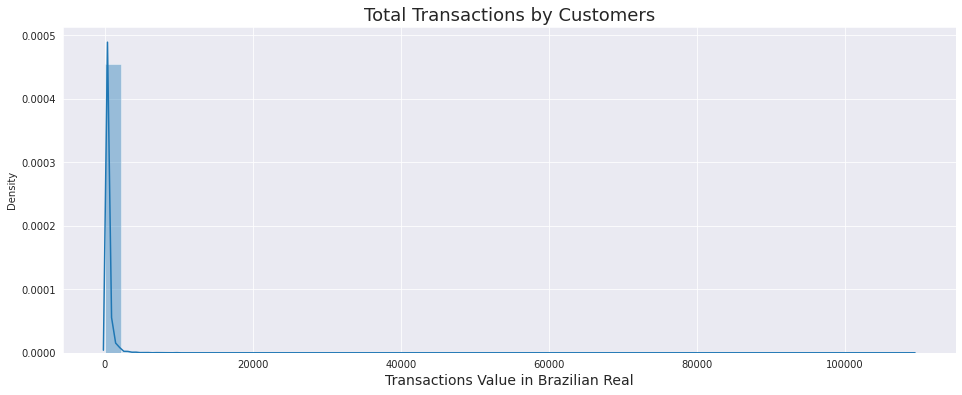

In [42]:
# Distribusi monetary
plt.figure(figsize=(16, 6))
sns.distplot(customer['monetary'])
plt.title('Total Transactions by Customers', fontsize=18)
plt.xlabel('Transactions Value in Brazilian Real', fontsize=14)
plt.show()

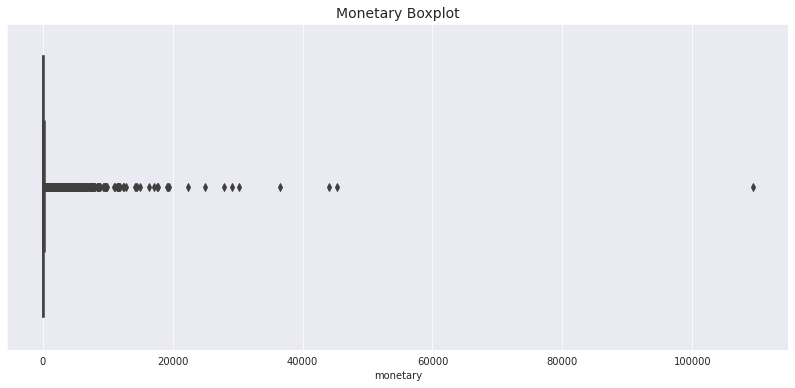

In [43]:
# Monetary Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(customer['monetary'])
plt.title('Monetary Boxplot', fontsize=14)
plt.show()

In [44]:
customer['monetary'].describe()

count     94087.000000
mean        213.601225
std         644.666063
min           9.590000
25%          64.000000
50%         113.050000
75%         203.300000
max      109312.640000
Name: monetary, dtype: float64

> Berdasarkan distribusi dan statistik deskriptif dari monetary:
- Total pembelian dari setiap customer berada dikisaran angka R\$ 9 - R\$ 109,312 dan memiliki rata-rata di angka R\$ 213
- Mayoritas customer memiliki total transaksi dikisaran angka R\$ 9 - R\$ 20,000
- Hal ini menunjukkan bahwa mayoritas customer memiliki daya beli yang relatif rendah.

## Recency, Frequency, and Monetary:

In [46]:
cust_df = pd.read_csv('/content/drive/MyDrive/Project Purwadhika/customer.csv')

In [47]:
px.scatter_3d(cust_df, x = 'recency', y = 'frequency', z = 'monetary')